# Uber Trips Analysis

Download dataset from this kaggle [link](https://www.kaggle.com/shivamparate/uberrawdataapr14csv)

This is uber trips dataset for the month of April2014 - for New York city.

### Steps
#### 1. Import necessary libraries
#### 2. Read the dataset using Pandas
#### 3. Explore the dataset properties
#### 4. Visualize the relationship between different variables and draw insights. 

In [1]:
# import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the dataset and display first 5 records
uber_df = pd.read_csv("uber-raw-data-apr14.csv")
uber_df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [3]:
# display last 5 records
uber_df.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [4]:
# find shape of dataset
uber_df.shape

(564516, 4)

In [5]:
# understand dataset properties
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


#### Let's break the Date/Time column to "Day", "Hour", & "Weekday".

In [6]:
# change "Date/Time" columns data type from string to datetime
uber_df['Date/Time'] = pd.to_datetime(uber_df['Date/Time'])

# break the Date/Time column to "Day", "Hour", & "Weekday"
uber_df["Day"] = uber_df["Date/Time"].apply(lambda x: x.day)
uber_df["Hour"] = uber_df["Date/Time"].apply(lambda x: x.hour)
uber_df["Weekday"] = uber_df["Date/Time"].apply(lambda x: x.weekday())

uber_df.head()

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,0,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,0,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,0,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,0,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,0,1


In [7]:
uber_df.tail()

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,23,2
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,23,2
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,23,2
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,23,2
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,23,2


### Now, let's create histograms showing density of rides per day, hours and weekdays

Text(0, 0.5, 'Density of rides')

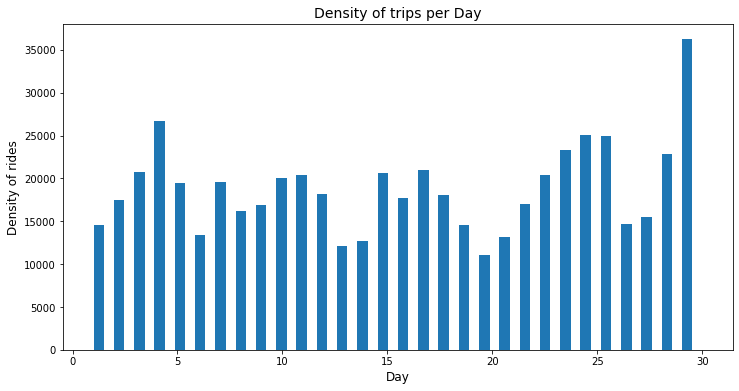

In [8]:
# visualize density of rides per day of the month
fig, ax = plt.subplots(figsize = (12,6))
plt.hist(uber_df.Day, width=0.5, bins=30)
plt.title("Density of trips per Day", fontsize=14)
plt.xlabel("Day", fontsize=12)
plt.ylabel("Density of rides", fontsize=12)

#### Observations

From the above plot, we can notice that:`
1. **Highest** number of rides are during working days (`Monday to Friday`)
2. **Least** number of rides are during `weekends`

Text(0, 0.5, 'Density of rides')

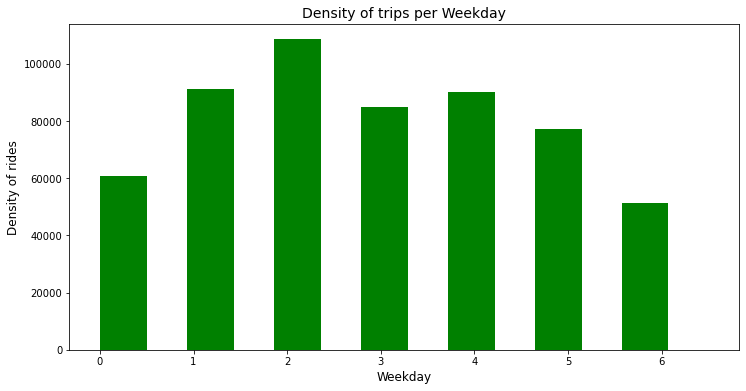

In [9]:
# Visualize the density of rides per weekday
fig, ax = plt.subplots(figsize= (12,6))
plt.hist(uber_df["Weekday"], width=0.5, range=(0, 6.5), bins=7, color="green")
plt.title("Density of trips per Weekday", fontsize=14)
plt.xlabel("Weekday", fontsize=12)
plt.ylabel("Density of rides", fontsize=12)

### Observations

From the above plot we can notice that:
1. For this month, **busiest** day in the week for Uber is `Tuesday`
2. and `Saturday` is the day with **least** number of rides

Text(0, 0.5, 'Density of rides')

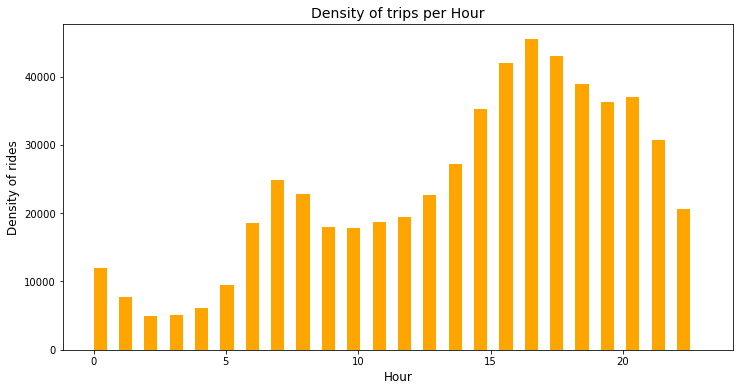

In [10]:
# Visualize the density of rides per Hour
fig, ax = plt.subplots(figsize=(12,6))
plt.hist(uber_df.Hour, width=0.5, bins=24, color="orange")
plt.title("Density of trips per Hour", fontsize=14)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Density of rides", fontsize=12)

#### Observations

From the above plot, we can notice that:`
1. During `nightime` from `1 AM to 4 AM`, number of rides `decrease` gradually
2. During `daytime` from `5 AM onwards`, number of rides starts `increasing` till it reaches `peak` at `6 PM`

Text(0, 0.5, 'Lattitude')

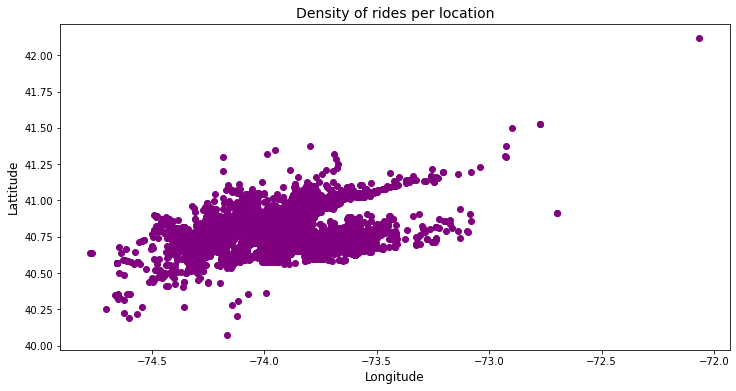

In [11]:
# Visualize the density of rides per location
fig, ax = plt.subplots(figsize=(12,6))
x = uber_df.Lon
y = uber_df.Lat
plt.scatter(x, y, color="purple")
plt.title("Density of rides per location", fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Lattitude", fontsize=12)

#### Observations

From the above plot, we can notice that:`
1. The region with `highest` density of rides is near `Manhattan`
2. while the region with `lowest` density is near `New Jersey`